In [2]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
import ipywidgets as widgets
from matplotlib.patches import Rectangle

In [2]:
#Pulling in pre binned data to combine w ids

ids = np.load("../../data/spike_clusters.npy")
# binned_spikes = np.load("../../data/binned_20ms.npy")
# spike_data =  pd.DataFrame(binned_spikes)
# spike_data

# To pull out stim data
event_start = np.load("../../data/natImsOnTimes.npy")
event_start
#to bin: divide by 20, floor
stim_binned = np.floor(event_start*1000 /20)
stim_binned = np.transpose(stim_binned)
event_ids = np.load("../../data/natImsIDs.npy") # max is 10
stims = np.vstack((stim_binned, event_ids))
# stims = pd.DataFrame(stims)
# stims.columns = stims.iloc[0]
# stims = stims.drop(0)

# stim_ids

In [3]:

def spikes_bin_data(spike_times_raw_data, spike_clusters_data):
    spike_times_raw_data = np.squeeze(spike_times_raw_data)
    spike_clusters_data = np.squeeze(spike_clusters_data)
    spike_times_sec = spike_times_raw_data / 3e4 # convert from 30khz samples to seconds
    # set up bin edges - 20 ms here
    bins_seconds = np.arange(np.min(spike_times_sec), np.max(spike_times_sec), 0.02)
    # make list of lists for spike times specific to each cluster
    spikes = [spike_times_sec[spike_clusters_data == cluster] for cluster in np.unique(spike_clusters_data)]
    # bin
    binned_spikes = []
    for cluster in spikes:
        counts, _ = np.histogram(cluster, bins_seconds)
        binned_spikes.append(counts)
    binned_spikes = np.array(binned_spikes) # should be [#neurons, #bins]
    return binned_spikes

In [4]:
#Assumptions: spiking data in 20 ms bins, stim data in seconds
# LOAD FILES BEFORE
# DEFINE IN SECONDS - 0.02 BINS, 0.1 + 0.5 WINDOWS
# if prev and post aren't exact intervals, flash warning and find nearest bin
def spikes_binned_event_average(binned_spikes, event_start, event_ids, bin_size_sec=0.02, window_start_sec = 0.1, window_end_sec = 0.5):
    bintime_prev = int(window_start_sec * 50)
    bintime_post = int(window_end_sec * 50 + 1)
    windowsize = bintime_prev + bintime_post
    bin_size = bin_size_sec * 1000

    # To bin: divide by 20, floor
    stim_binned = np.floor(event_start * 1000 / bin_size).astype(int)
    stim_binned = np.transpose(stim_binned)


    u_stim_ids = np.unique(event_ids)

    # Initialize final_avg matrix
    final_avg = np.empty((binned_spikes.shape[0], len(u_stim_ids), windowsize))

    for neuron_id in range(binned_spikes.shape[0]):

        for stim_id in u_stim_ids:
            stim_indices = np.where(event_ids[0] == stim_id)[0]

            neuron_stim_data = np.empty((len(stim_indices), windowsize))
            
            for i, stim_idx in enumerate(stim_indices):
                bin_id = int(stim_binned[0][stim_idx])
                selected_columns = binned_spikes[neuron_id, bin_id - bintime_prev: bin_id + bintime_post]
                neuron_stim_data[i,:] = selected_columns

            bin_average = np.mean(neuron_stim_data, axis=0)
            final_avg[neuron_id, int(stim_id) - 1, :] = bin_average
    return final_avg


In [5]:
from pathlib import Path
dpath = Path(r'../../data/')
st_samp = np.load(dpath / 'spike_times.npy')
sc = np.load(dpath / 'spike_clusters.npy')
binned_spikes = spikes_bin_data(st_samp,sc)
event_start = np.load("../../data/natImsOnTimes.npy")
event_ids = np.load("../../data/natImsIDs.npy") 
test = spikes_binned_event_average(binned_spikes,event_start,event_ids)
test

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.00666667, 0.        , 0.        , ..., 0.00666667,
         0.        , 0.00666667],
        [0.        , 0.        , 0.        , ..., 0.00666667,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.00666667, ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.00666667,
         0.        , 0.        ]],

       [[0.03333333, 0.04      , 0.06      , ..., 0.07333333,
         0.08666667, 0.02666667],
        [0.03333333, 0.06      , 0.04666667, ..., 0.03333333,
         0.06666667, 0.03333333],
        [0.04666667, 0.06      , 0.04666667, ..., 0.08666667,
         0.08666667, 0.06      ],
        ...,
        [0.06666667, 0.04      , 0.03333333, ..., 0.06      ,
         0.03333333, 0.02      ],
        [0.0

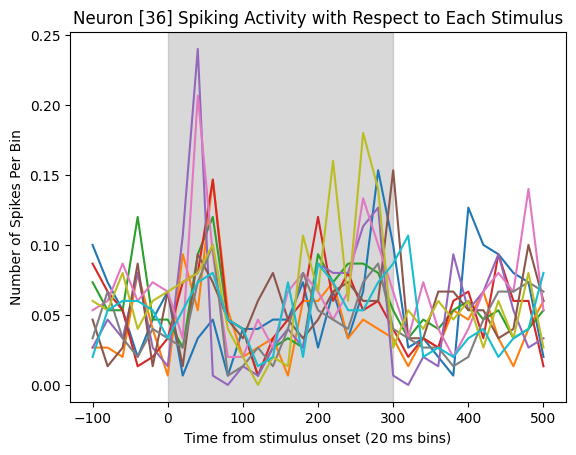

In [27]:
for i in range(0,10):
    y = test[36][i]
    x = np.arange(-100, 520, step=20)
    plt.plot(x,y)
    # print("x")
    # print(x)
    # print("y")
    # print(y)
# Assuming combined is your DataFrame
# y = final_avg[0][5]  # Adjusted slicing indices
 # Adjusted slicing indices


plt.xlabel('Time from stimulus onset (20 ms bins)')
# plt.xticks(np.arange(-100, 520, step=31))

plt.ylabel('Number of Spikes Per Bin')
plt.title('Neuron [36] Spiking Activity with Respect to Each Stimulus')

# Add the gray rectangle
plt.axvspan(0, 300, color='gray', alpha=0.3)

plt.show()


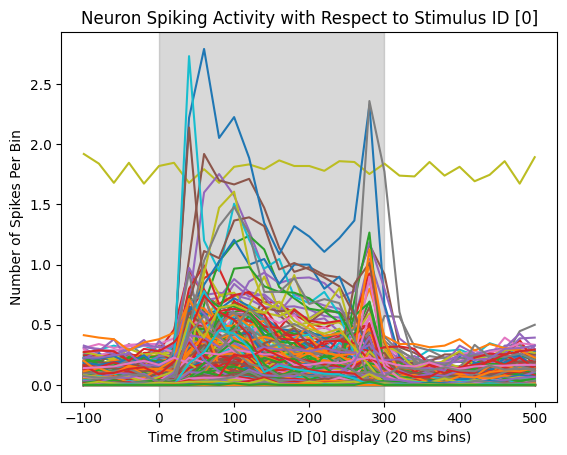

In [29]:
for i in range(0,753):
    y = test[i][0]
    x = np.arange(-100, 520, step=20)
    plt.plot(x,y)
    # print("x")
    # print(x)
    # print("y")
    # print(y)
# Assuming combined is your DataFrame
# y = final_avg[0][5]  # Adjusted slicing indices
 # Adjusted slicing indices


plt.xlabel('Time from Stimulus ID [0] display (20 ms bins)')
# plt.xticks(np.arange(-100, 520, step=31))

plt.ylabel('Number of Spikes Per Bin')
plt.title('Neuron Spiking Activity with Respect to Stimulus ID [0]')

# Add the gray rectangle
plt.axvspan(0, 300, color='gray', alpha=0.3)

plt.show()


In [11]:
def plot_event_average_interaction(): #wrapper function
    
#graph: slider for time, dropdown for which id to show

IndentationError: expected an indented block (1817023996.py, line 3)

In [3]:
allen = pd.read_csv("../../data/allen_visual_behavior_firing_rate.csv")
allen = allen.iloc[::400]


In [133]:
def slope_viz_neurons(t=0):
    t = int(t)
    if t<25:
        x = spike_data.columns[0:25].to_list()
        y = spike_data.iloc[:,0:25].sum().to_list()
    else:
        x = spike_data.columns[t-50:t+50].to_list()
        y = spike_data.iloc[:,t-50:t+50].sum().to_list()
    plt.scatter(x, y, label='Spikes')
    plt.axvline(t, color='red', linestyle='--',)
    plt.xlabel('Time(in 20ms bins)')
    plt.ylabel('Num Spikes')
    plt.legend()
    plt.show()
    print(len(x))
    print(len(y))

probably smoother to have the line move than to have the entire graph move, maybe pass in edges of the graphs as parameters?
def add more widget functions to the ui to clean it up
need to combine with image dataset, maybe transparent boxes or something?
should data be put into bigger bins?

In [134]:
slider = widgets.FloatSlider(value=0.0, min=0.0, max=500.0, step=5.0, description='Time')
slider.layout.width = "100%"
widgets.interact(slope_viz_neurons, t=slider)

interactive(children=(FloatSlider(value=0.0, description='Time', layout=Layout(width='100%'), max=500.0, step=…

<function __main__.slope_viz_neurons(t=0)>